In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets

In [20]:
df = pd.read_csv('/srv/ftp/Qlik/ProductCategoryBasket.csv')

In [21]:
df.head()


,TransactionId,StoreId,ProductCategory,MerchandiseId,Quantity
0,2087,150,L.S FRUIT SEC 5.5 %5 5,500811,2
1,13029,150,L.S FRUIT SEC 5.5 %5 5,500811,1
2,24562,150,L.S FRUIT SEC 5.5 %5 5,500811,2
3,11139,150,L.S FRUIT SEC 5.5 %5 5,500811,1
4,18093,150,L.S FRUIT SEC 5.5 %5 5,500811,1


In [57]:
baskets = df.pivot_table('Quantity', ['TransactionId', 'StoreId'], 'MerchandiseId')

In [48]:
baskets.head()

,MerchandiseId,100010,100015,100016,100017,100018,300057,300058,300060,300061,300062,...,500814,500815,500816,500818,500819,500821,500822,500823,500825,500827
TransactionId,StoreId,,,,,,,,,,,,,,,,,,,,,
1,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,150,NaN,2.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,...,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN


In [35]:
len(baskets.index)

15379

In [58]:
baskets = baskets.dropna(axis = 1, thresh= len(baskets.index) * 0.01)

In [59]:
baskets.dropna(axis = 0, thresh= 1)

,MerchandiseId,100010,100015,100016,100017,100018,300062,500811,500812,500813,500814,500815,500816,500818,500819,500821,500822,500823,500825
TransactionId,StoreId,,,,,,,,,,,,,,,,,,
1,150,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,150,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,150,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0
9,150,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,150,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
12,150,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
15,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [64]:
print(baskets.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15379 entries, (1, 150) to (32183, 150)
Data columns (total 18 columns):
100010    3891 non-null float64
100015    3537 non-null float64
100016    1511 non-null float64
100017    840 non-null float64
100018    4566 non-null float64
300062    4307 non-null float64
500811    1267 non-null float64
500812    1566 non-null float64
500813    1306 non-null float64
500814    212 non-null float64
500815    498 non-null float64
500816    5621 non-null float64
500818    2868 non-null float64
500819    295 non-null float64
500821    2255 non-null float64
500822    835 non-null float64
500823    1146 non-null float64
500825    1029 non-null float64
dtypes: float64(18)
memory usage: 2.3 MB
None


In [67]:
baskets = baskets.fillna(0)

In [68]:
df = pd.DataFrame(baskets.to_records())

In [71]:
df.head()

,TransactionId,StoreId,100010,100015,100016,100017,100018,300062,500811,500812,500813,500814,500815,500816,500818,500819,500821,500822,500823,500825
0,1,150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,150,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,150,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,150,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0


In [87]:
X = df.iloc[:, 2:len(baskets.columns)+2]

In [88]:
X

,100010,100015,100016,100017,100018,300062,500811,500812,500813,500814,500815,500816,500818,500819,500821,500822,500823,500825
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = X_scaled - X_scaled.mean(axis=0)

In [110]:
X_scaled

array([[-0.4652002 , -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ],
       [-0.4652002 , -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ],
       [ 3.63880891, -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ],
       ...,
       [-0.4652002 , -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ],
       [-0.4652002 , -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ],
       [-0.4652002 , -0.43666655, -0.26889902, ..., -0.2149468 ,
        -0.25148054, -0.2512651 ]])

In [111]:
pca = decomposition.PCA(n_components=2)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


In [112]:
X_pca

array([[-1.12624288,  0.16047536],
       [-0.58347986,  0.46236939],
       [-0.23730688,  1.05171203],
       ...,
       [-0.83308696,  0.4342031 ],
       [-0.87283746,  0.48971716],
       [-0.75933746,  0.13445718]])

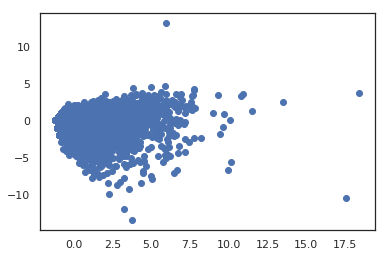

In [113]:
plt.scatter(X_pca[:,0], X_pca[:,1])

In [95]:
X_pca[:,0]

array([-1.03946101, -0.73946522, -0.89305711, ..., -0.89025083,
       -1.05825034, -0.89483756])

In [118]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

In [121]:
X

,100010,100015,100016,100017,100018,300062,500811,500812,500813,500814,500815,500816,500818,500819,500821,500822,500823,500825
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
X_tsne

array([[ 41.449883 , -25.959152 ],
       [-65.17607  ,  30.883127 ],
       [-35.424522 ,  46.33196  ],
       ...,
       [ 23.085161 ,   9.289651 ],
       [ 49.706013 ,  30.986015 ],
       [ 44.708656 ,  -4.6684155]], dtype=float32)

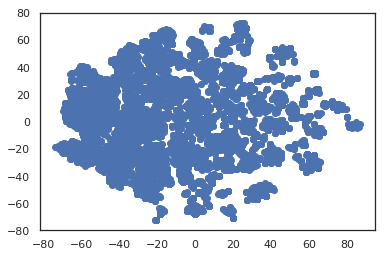

In [123]:
plt.scatter(X_tsne[:,0], X_tsne[:,1])

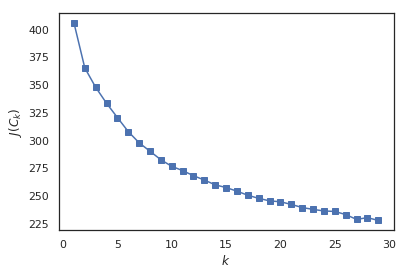

In [126]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [127]:
kmeans = KMeans(n_clusters=7, random_state=1).fit(X)

In [130]:
result = kmeans.predict(X)

In [137]:
result[14:120]

array([3, 3, 3, 6, 3, 0, 3, 3, 0, 1, 1, 3, 0, 3, 3, 1, 2, 3, 3, 0, 3, 6,
       6, 3, 3, 2, 6, 6, 6, 3, 6, 6, 0, 4, 3, 3, 3, 2, 3, 0, 3, 3, 1, 3,
       3, 3, 3, 6, 6, 3, 3, 0, 2, 2, 0, 3, 2, 6, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 6, 6, 3, 3,
       3, 3, 2, 3, 3, 1, 6, 2, 3, 1, 3, 3, 2, 0, 3, 3, 3, 3], dtype=int32)

In [55]:
kmeans

<bound method NDFrame.head of MerchandiseId          100010  100015  100016  100017  100018  300062  500811  \
TransactionId StoreId                                                           
1             150         0.0     0.0     0.0     0.0     0.0     0.0     1.0   
2             150         0.0     0.0     0.0     0.0     0.0     2.0     1.0   
3             150         4.0     0.0     0.0     0.0     1.0     0.0     0.0   
4             150         0.0     0.0     0.0     0.0     0.0     1.0     0.0   
6             150         0.0     2.0     1.0     0.0     1.0     0.0     0.0   
9             150         0.0     1.0     0.0     0.0     0.0     0.0     1.0   
10            150         0.0     0.0     0.0     0.0     0.0     4.0     0.0   
12            150         0.0     0.0     0.0     0.0     1.0     0.0     2.0   
15            150         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16            150         0.0     3.0     0.0     0.0     0.0     4.0     0.0  

In [56]:
print(baskets.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15379 entries, (1, 150) to (32183, 150)
Data columns (total 18 columns):
100010    15379 non-null float64
100015    15379 non-null float64
100016    15379 non-null float64
100017    15379 non-null float64
100018    15379 non-null float64
300062    15379 non-null float64
500811    15379 non-null float64
500812    15379 non-null float64
500813    15379 non-null float64
500814    15379 non-null float64
500815    15379 non-null float64
500816    15379 non-null float64
500818    15379 non-null float64
500819    15379 non-null float64
500821    15379 non-null float64
500822    15379 non-null float64
500823    15379 non-null float64
500825    15379 non-null float64
dtypes: float64(18)
memory usage: 2.3 MB
None


In [ ]:
dropna()

In [24]:
print(baskets.Shape)

AttributeError: 'DataFrame' object has no attribute 'Shape'

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 8 columns):
ProductId               1777 non-null int64
TransactionId           1777 non-null int64
StoreId                 1777 non-null int64
TransactionDate         1777 non-null object
LineNumber              1777 non-null int64
Quantity                1777 non-null int64
MerchandiseID           1777 non-null int64
Merchandise.Category    1777 non-null object
dtypes: int64(6), object(2)
memory usage: 111.1+ KB
None
